In [79]:
import pandas as pd
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import os
import sys
from collections import defaultdict
import random
from matplotlib.ticker import MaxNLocator

# Read the data
df = pd.read_excel('./excel_files/group1.xlsx')
df.head()

,ID,Start time,Completion time,Email,Name,Last modified time,Your Answer for q1.c,Your Answer for q1.cpp,Your Answer for q1.java,Your Answer for q1.js,...,"In your opinion, what are the main strengths of the VSCode extension?","Were there any vulnerabilities that the extension failed to identify? If yes, please specify.",What limitations or areas for improvement have you identified in the VSCode extension?,Please share any other feedback or suggestions you have about the VSCode extension!,(q1.c)Task Completion Time,(q1.cpp)Task Completion Time,(q1.java)Task Completion Time,(q1.js)Task Completion Time,(q1.py)Task Completion Time,(q2.py)Task Completion Time
0,1,2024-04-09 22:10:48,2024-04-09 22:35:27,anonymous,NaN,NaN,Out-of-bounds Read,CWE-78: OS Command Injection,CWE-190: Integer Overflow or Wraparound,CWE-22,...,It is quick and helps to identify the vulnerab...,NaN,1. Maybe providing some references will be hel...,NaN,3.00.36,2.21.2,1.23.97,1.53.94,0.31.53,0.22.16
1,2,2024-04-10 13:06:49,2024-04-10 13:36:16,anonymous,NaN,NaN,CWE-125,CWE-78,No vulnerability,CWE-22,...,Scanning large code bases faster than humans c...,"None, but one fix provided did not solve the i...",Some visual feedback if this code is vulnerabl...,"Great help, but I dont want to have to read th...",4.03.47,3.45.08,1.50.83,1.49.54,2.14.74,3.12.37
2,3,2024-04-10 15:11:37,2024-04-10 15:26:37,anonymous,NaN,NaN,CWE-125,CWE-78,CWE-190,CWE-22,...,"easy, knows more than me, convenient",no,it may make the user overly trust it and not d...,most helpful would be inline tips and maybe au...,1.41.27,2.14.69,1.37.95,1.22.13,0.47.98,2.32.47
3,4,2024-04-10 15:39:40,2024-04-10 15:55:08,anonymous,NaN,NaN,CWE-125,CWE-78,CWE-190,CWE-22,...,Direct integration into development environmen...,No,I'd be great to have a default shortcut for th...,Really cool stuff! Reminded me of what Snyk do...,1.54.81,0.49.98,0.30.69,0.18.17,0.48.50,0.27.77
4,5,2024-04-11 10:34:09,2024-04-11 10:49:06,anonymous,NaN,NaN,OOB read,OS Command Injection,Integer Overflow,Path Traversal,...,will help with review fatigue,no,add a button to suggest possible fixes?,need a better extension icon do to it justice :),0.39.50,0.49.11,0.53.74,1.26.85,1.29.68,2.11.50


In [80]:
df.columns

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name',
       'Last modified time', 'Your Answer for q1.c', 'Your Answer for q1.cpp',
       'Your Answer for q1.java', 'Your Answer for q1.js',
       'Your Answer for q1.py', 'Your Answer for q2.py', 'Scale', 'Scale2',
       'Scale3', 'Scale4',
       'In your opinion, what are the main strengths of the VSCode extension?',
       'Were there any vulnerabilities that the extension failed to identify? If yes, please specify.',
       'What limitations or areas for improvement have you identified in the VSCode extension?',
       'Please share any other feedback or suggestions you have about the VSCode extension!',
       '(q1.c)Task Completion Time', '(q1.cpp)Task Completion Time',
       '(q1.java)Task Completion Time', '(q1.js)Task Completion Time',
       '(q1.py)Task Completion Time', '(q2.py)Task Completion Time'],
      dtype='object')

Below is the result of "How **helpful** did you find the extension for identifying vulnerabilities in source code?"

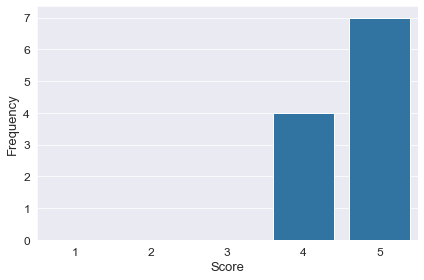

In [81]:
# Ensure that 'Scale' includes categories for all potential scale values (1-5)
df['Scale'] = pd.Categorical(df['Scale'], categories=[1, 2, 3, 4, 5])

sns.set_style("darkgrid")
# Create the countplot specifying the order of categories
sns.countplot(x='Scale', data=df, color=sns.color_palette("tab10")[0], order=[1, 2, 3, 4, 5])
plt.xlabel('Score', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# tight layout
plt.tight_layout()
# Save the plot as pdf file with the name of "how_helpful.pdf"
plt.savefig('outputs/how_helpful.pdf')
plt.show()

/var/folders/_v/_8q_jx1d5yvb945rch5712vm0000gn/T/ipykernel_19227/1479359169.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend


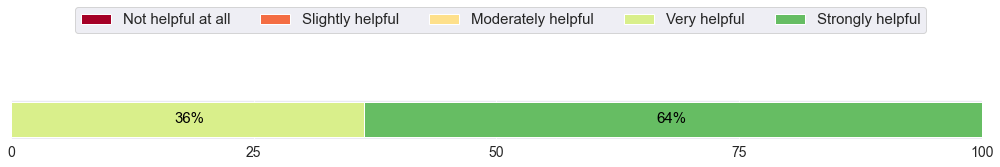

In [154]:

# Data
response = ["Not helpful at all", "Slightly helpful", "Moderately helpful", "Very helpful", "Strongly helpful"]
percentages = [0, 0, 0, (4/11)*100, (7/11)*100]

# Round percentages to the nearest integer
# percentages = [round(p) for p in percentages]

# Calculate cumulative percentages
cum_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 2.2))

# Create stacked horizontal bar
for i in range(len(percentages)):
    if i == 0:
        ax.barh(0, percentages[i], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)
    else:
        ax.barh(0, percentages[i], left=cum_percentages[i-1], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)

# Add percentage labels only for non-zero values
for i, v in enumerate(percentages):
    if v != 0:
        v = round(v)
        ax.text(cum_percentages[i] - v/2, 0, str(int(v)) + "%", va='center', ha='center', color='black', fontsize=15)

# Set x-axis limits
ax.set_xlim(0, 100)

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Add x-axis ticks
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(["0", "25", "50", "75", "100"])  # Use an empty string for the first label
plt.xticks(fontsize=14)

# Add labels
# ax.set_title("(Q7) How helpful did you find the extension for identifying vulnerabilities in source code?", fontsize=13, pad=25)
ax.set_title(" ", fontsize=14, pad=50)

# Create a new axis for the legend
legend_ax = plt.axes([0.3, 0.9, 0.4, 0.1], frameon=False)

# Adjust the position of the legend axis
legend_ax.xaxis.set_visible(False)
legend_ax.yaxis.set_visible(False)

# Add legend horizontally at the top center
legend_ax.legend(ax.containers, response, loc='center', ncol=len(response), fontsize=15)

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend

# Save the plot as pdf file with the name of "how_helpful_bar_stacked.png". with additional padding
plt.savefig('outputs/how_helpful_bar_stacked.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

Below is the result of "How **easy** was the extension to use for scanning vulnerabilities?"

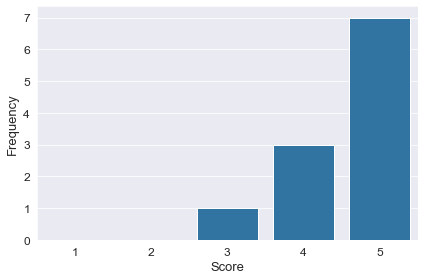

In [83]:
# Ensure that 'Scale' includes categories for all potential scale values (1-5)
df['Scale2'] = pd.Categorical(df['Scale2'], categories=[1, 2, 3, 4, 5])

sns.set_style("darkgrid")
# Create the countplot specifying the order of categories
sns.countplot(x='Scale2', data=df, color=sns.color_palette("tab10")[0], order=[1, 2, 3, 4, 5])
plt.xlabel('Score', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# tight layout
plt.tight_layout()
plt.savefig('outputs/how_easy.pdf')
plt.show()

/var/folders/_v/_8q_jx1d5yvb945rch5712vm0000gn/T/ipykernel_19227/1060913126.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend


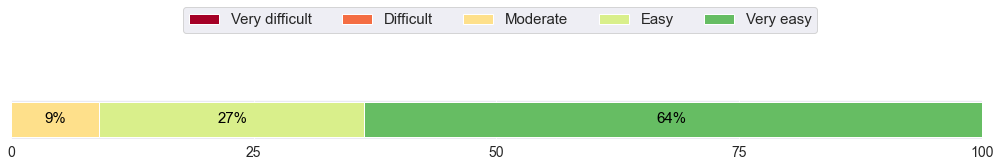

In [150]:

# Data
response = ["Very difficult", "Difficult", "Moderate", "Easy", "Very easy"]
percentages = [0, 0, (1/11)*100, (3/11)*100, (7/11)*100]

# Calculate cumulative percentages
cum_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 2.2))

# Create stacked horizontal bar
for i in range(len(percentages)):
    if i == 0:
        ax.barh(0, percentages[i], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)
    else:
        ax.barh(0, percentages[i], left=cum_percentages[i-1], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)

# Add percentage labels only for non-zero values
for i, v in enumerate(percentages):
    if v != 0:
        v = round(v)
        ax.text(cum_percentages[i] - v/2, 0, str(int(v)) + "%", va='center', ha='center', color='black', fontsize=15)

# Set x-axis limits
ax.set_xlim(0, 100)

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Add x-axis ticks
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(["0", "25", "50", "75", "100"])  # Use an empty string for the first label
plt.xticks(fontsize=14)

# Add labels
# ax.set_title("(Q8) how easy was the extension to use for scanning vulnerabilities?", fontsize=13, pad=20)
ax.set_title(" ", fontsize=14, pad=50)

# Create a new axis for the legend
legend_ax = plt.axes([0.3, 0.9, 0.4, 0.1], frameon=False)

# Adjust the position of the legend axis
legend_ax.xaxis.set_visible(False)
legend_ax.yaxis.set_visible(False)

# Add legend horizontally at the top center
legend_ax.legend(ax.containers, response, loc='center', ncol=len(response), fontsize=15)

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend

plt.savefig('outputs/how_easy_bar_stacked.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

Below is the result of "How **intuitive** was the interface of the VSCode extension?"

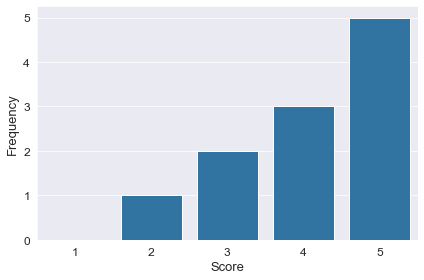

In [85]:
# Ensure that 'Scale' includes categories for all potential scale values (1-5)
df['Scale3'] = pd.Categorical(df['Scale3'], categories=[1, 2, 3, 4, 5])

sns.set_style("darkgrid")
# Create the countplot specifying the order of categories
sns.countplot(x='Scale3', data=df, color=sns.color_palette("tab10")[0], order=[1, 2, 3, 4, 5])
plt.xlabel('Score', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('outputs/how_intuitive.pdf')
plt.show()

/var/folders/_v/_8q_jx1d5yvb945rch5712vm0000gn/T/ipykernel_19227/1061764802.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend


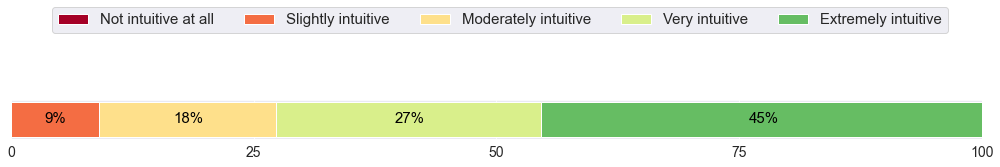

In [152]:

# Data
response = ["Not intuitive at all", "Slightly intuitive", "Moderately intuitive", "Very intuitive", "Extremely intuitive"]
percentages = [0, (1/11)*100, (2/11)*100, (3/11)*100, (5/11)*100]

# Calculate cumulative percentages
cum_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 2.2))

# Create stacked horizontal bar
for i in range(len(percentages)):
    if i == 0:
        ax.barh(0, percentages[i], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)
    else:
        ax.barh(0, percentages[i], left=cum_percentages[i-1], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)

# Add percentage labels only for non-zero values
for i, v in enumerate(percentages):
    if v != 0:
        v = round(v)
        ax.text(cum_percentages[i] - v/2, 0, str(int(v)) + "%", va='center', ha='center', color='black', fontsize=15)

# Set x-axis limits
ax.set_xlim(0, 100)

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Add x-axis ticks
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(["0", "25", "50", "75", "100"])  # Use an empty string for the first label
plt.xticks(fontsize=14)

# Add labels
# ax.set_title("(Q9) how intuitive was the interface of the VSCode extension?", fontsize=13, pad=20)
ax.set_title(" ", fontsize=14, pad=50)

# Create a new axis for the legend
legend_ax = plt.axes([0.3, 0.9, 0.4, 0.1], frameon=False)

# Adjust the position of the legend axis
legend_ax.xaxis.set_visible(False)
legend_ax.yaxis.set_visible(False)

# Add legend horizontally at the top center
legend_ax.legend(ax.containers, response, loc='center', ncol=len(response), fontsize=15)

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend

plt.savefig('outputs/how_intuitive_bar_stacked.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

Below is the result of "How **satisfied** are you with the **response speed** of the vulnerability scanning process?

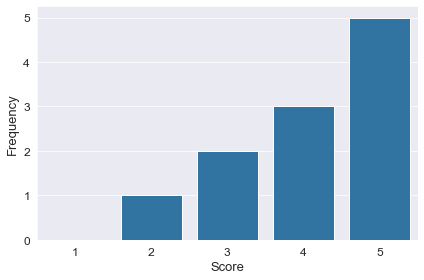

In [87]:
# Ensure that 'Scale' includes categories for all potential scale values (1-5)
df['Scale3'] = pd.Categorical(df['Scale3'], categories=[1, 2, 3, 4, 5])

sns.set_style("darkgrid")
# Create the countplot specifying the order of categories
sns.countplot(x='Scale3', data=df, color=sns.color_palette("tab10")[0], order=[1, 2, 3, 4, 5])
plt.xlabel('Score', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('outputs/how_satisfied_speed.pdf')
plt.show()

/var/folders/_v/_8q_jx1d5yvb945rch5712vm0000gn/T/ipykernel_19227/2553888383.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend


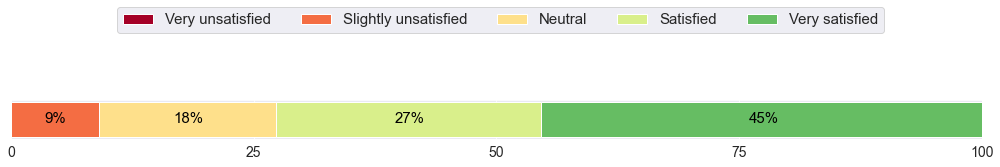

In [153]:

# Data
response = ["Very unsatisfied", "Slightly unsatisfied", "Neutral", "Satisfied", "Very satisfied"]
percentages = [0, (1/11)*100, (2/11)*100, (3/11)*100, (5/11)*100]

# Calculate cumulative percentages
cum_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 2.2))

# Create stacked horizontal bar
for i in range(len(percentages)):
    if i == 0:
        ax.barh(0, percentages[i], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)
    else:
        ax.barh(0, percentages[i], left=cum_percentages[i-1], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)

# Add percentage labels only for non-zero values
for i, v in enumerate(percentages):
    if v != 0:
        v = round(v)
        ax.text(cum_percentages[i] - v/2, 0, str(int(v)) + "%", va='center', ha='center', color='black', fontsize=15)

# Set x-axis limits
ax.set_xlim(0, 100)

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Add x-axis ticks
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(["0", "25", "50", "75", "100"])  # Use an empty string for the first label
plt.xticks(fontsize=14)

# Add labels
# ax.set_title("(Q10) how satisfied are you with the response speed of the vulnerability scanning process?", fontsize=13, pad=20)
ax.set_title(" ", fontsize=14, pad=50)

# Create a new axis for the legend
legend_ax = plt.axes([0.3, 0.9, 0.4, 0.1], frameon=False)

# Adjust the position of the legend axis
legend_ax.xaxis.set_visible(False)
legend_ax.yaxis.set_visible(False)

# Add legend horizontally at the top center
legend_ax.legend(ax.containers, response, loc='center', ncol=len(response), fontsize=15)

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend

plt.savefig('outputs/how_satisfied_speed_bar_stacked.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

Let's make a table for all the values in the column of "In your opinion, what are the main strengths of the VSCode extension?"

In [16]:
# Output the all values of the "In your opinion, what are the main strengths of the VSCode extension?" column

print(df['In your opinion, what are the main strengths of the VSCode extension?'].values)

['It is quick and helps to identify the vulnerabilities of codes'
 'Scanning large code bases faster than humans could for the most likely security vulnerabilities.'
 'easy, knows more than me, convenient'
 'Direct integration into development environment, no need to use other external tools'
 'will help with review fatigue'
 'Identify potential vulnerabilites in code. Or to cross-check ideas for vulnterabilities'
 'Conciseness in the answer; direct linking to the respective CWE; structure of the answer always consistent, which makes it very easy to follow along when running multiple scans'
 'I have very limited knowledge of cybersecurity, the tool can help me validate my code before using it'
 'Easy-to-use tool to check code snippets (when in doubt)'
 'Formats questions to OpenAI in a clear-concise method, avoiding time loss. Quick to use'
 'speed up the code security analysis to quickly find out where to look after in more detail']


In [17]:
# Output the all values of the "Were there any vulnerabilities that the extension failed to identify? If yes, please specify." column

print(df['Were there any vulnerabilities that the extension failed to identify? If yes, please specify.'].values)

[nan
 'None, but one fix provided did not solve the issue. Q1: Out of bounds correctly suggested to not access the array with too large indicies, but ignored the possibility of negative indicies. '
 'no' 'No' 'no' 'Not that I am aware' 'not of my knowledge' 'No' 'no' 'No'
 'I am not sure, if there where some unidentified']


In [18]:
# Output the all values of the "What limitations or areas for improvement have you identified in the VSCode extension?" column

print(df['What limitations or areas for improvement have you identified in the VSCode extension?'].values)

['1. Maybe providing some references will be helpful for people who have less knowledges of Cyber Security. 2. If not manuelly delete scan results, it is hard to identify which scan results belong to which file or code blocks. '
 'Some visual feedback if this code is vulnerable like a red bar with the CWE code or a green bar if everything is okay would be great. '
 'it may make the user overly trust it and not do their own due diligence'
 "I'd be great to have a default shortcut for the extension. Also, it'd be cool to get a prompt with a code snippet containing a fix, like in GitHub copilot"
 'add a button to suggest possible fixes?'
 'It were two clicks to run for a single file. Scopewise, this will not cover the scope of a whole project. An idea for improvement could be to have this as a linter rule that runs on the fly and underlines vulnerable code and can be executed as part of a CI pipeline or a git hook.'
 'Speed: could run faster; '
 'Could use a keyboard shortcut for invoking

In [19]:
# Output the all values of the "Please share any other feedback or suggestions you have about the VSCode extension!" column

print(df['Please share any other feedback or suggestions you have about the VSCode extension!'].values)

[nan
 'Great help, but I dont want to have to read the explicit problem from a big block of text but want a quick feedback at the top with the most relevant information (CWE, line of code etc.) at the top before the complete answer.'
 'most helpful would be inline tips and maybe automatic checking on save or something similar'
 'Really cool stuff! Reminded me of what Snyk does. Keep it up!'
 'need a better extension icon do to it justice :)'
 'Suggestions in question 13. Cool idea and a great start to make security accessment easily accessible to a broad audience.'
 'Maybe let user chat with "Security expert" to further dive into the topic; instead of only offering which solutions could be applied, make improvement changes directly in the code ask ask user for confirmation to apply them'
 nan nan nan
 'very helpful, especially for non security engineers / normal software engineers']
